<a href="https://colab.research.google.com/github/sridhartroy/AIML/blob/main/SGD_Housing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.metrics import r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import SGDRegressor
from sklearn.preprocessing import StandardScaler

%matplotlib inline


In [ ]:
from sklearn.datasets import fetch_california_housing



california_housing = fetch_california_housing(as_frame=True)

In [ ]:
df = california_housing.frame

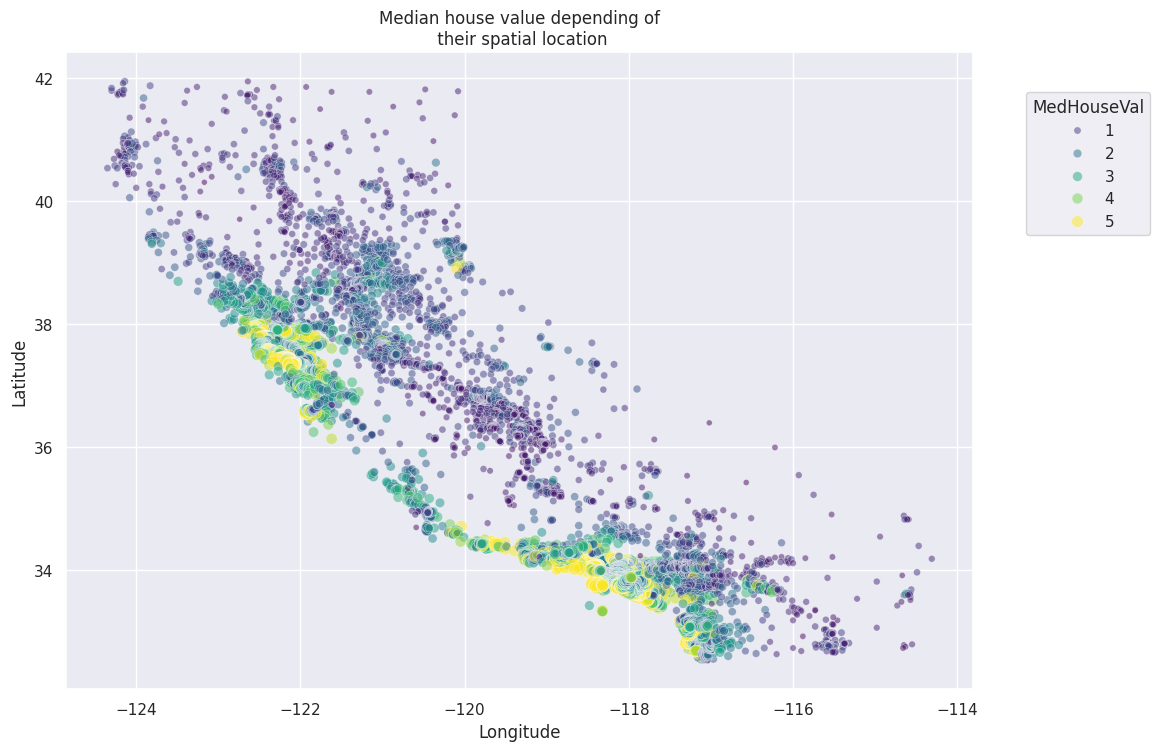

In [ ]:
import seaborn as sns

sns.scatterplot(data=df, x="Latitude", y="Longitude",
                size="MedHouseVal", hue="MedHouseVal",
                palette="viridis", alpha=0.5)
plt.legend(title="MedHouseVal", bbox_to_anchor=(1.05, 0.95),
           loc="upper left")
_ = plt.title("Median house value depending of\n their spatial location")

In [ ]:
df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


<Axes: >

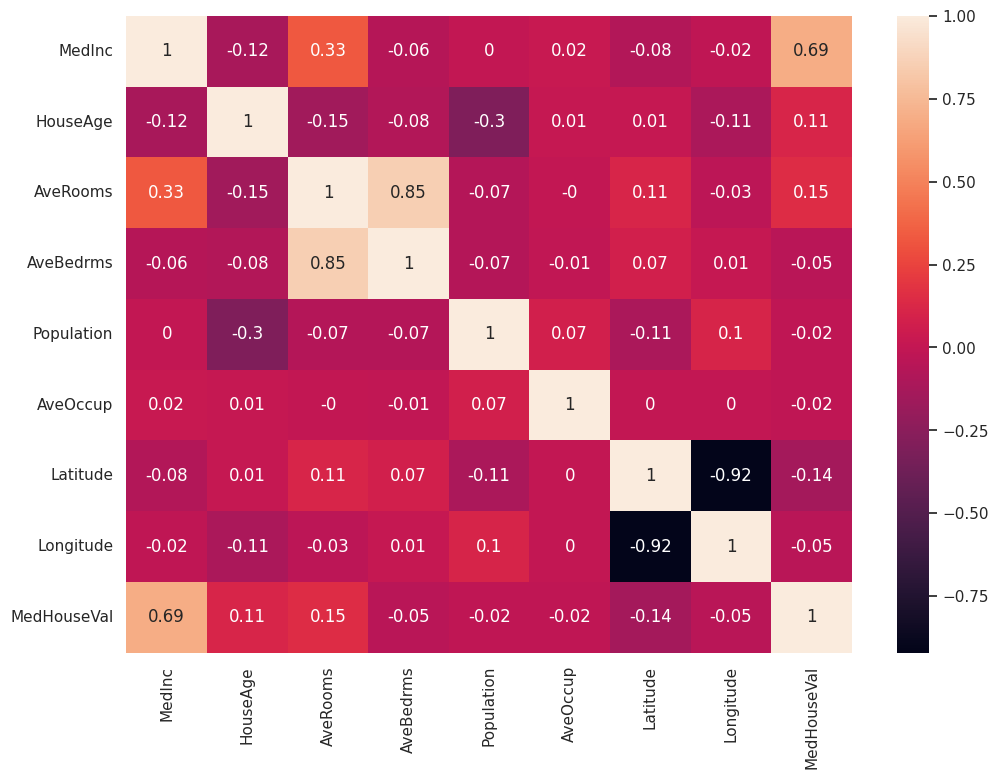

In [ ]:
correlation_matrix = df.corr().round(2)
# annot = True to print the values inside the square
sns.heatmap(data=correlation_matrix, annot=True)

In [ ]:
features_of_interest = ["MedInc", "Latitude", "AveRooms", "HouseAge"]
df[features_of_interest].describe()

,MedInc,Latitude,AveRooms,HouseAge
count,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,35.631861,5.429000,28.639486
std,1.899822,2.135952,2.474173,12.585558
min,0.499900,32.540000,0.846154,1.000000
25%,2.563400,33.930000,4.440716,18.000000
50%,3.534800,34.260000,5.229129,29.000000
75%,4.743250,37.710000,6.052381,37.000000
max,15.000100,41.950000,141.909091,52.000000


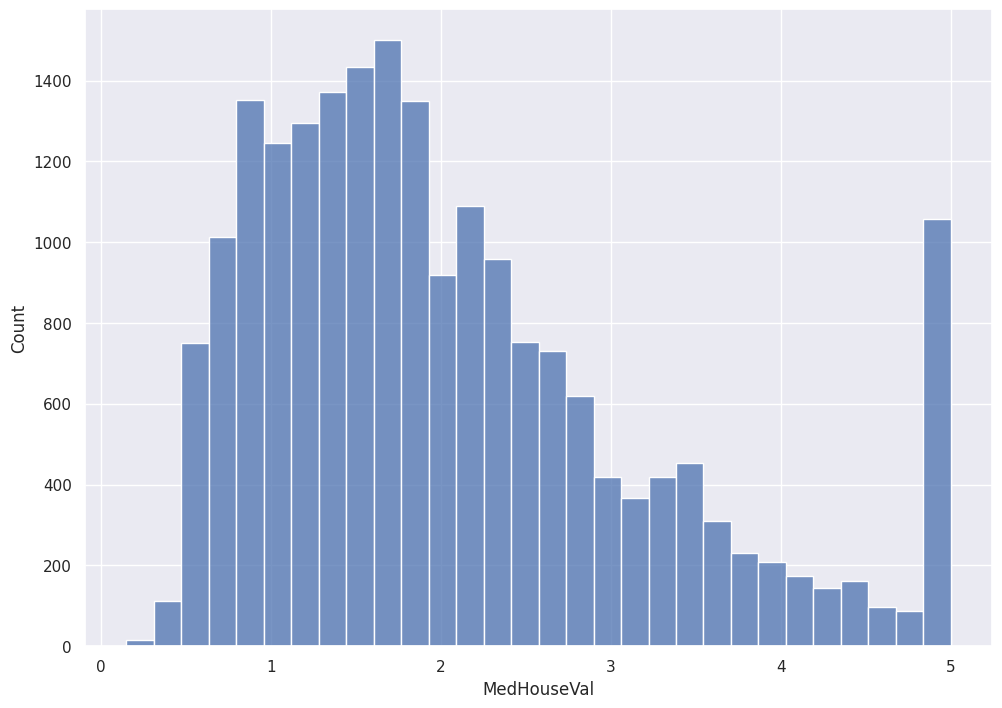

In [ ]:
sns.histplot(df['MedHouseVal'], bins=30)
plt.show()

In [ ]:
X = df[features_of_interest]
y = df['MedHouseVal']

In [ ]:
s = StandardScaler()
X = pd.DataFrame(s.fit(X).fit_transform(X))


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=5)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)


(16512, 4)
(4128, 4)
(16512,)
(4128,)


In [ ]:
model = SGDRegressor()
model.fit(X_train, y_train)

# model evaluation for training set
y_train_predict = model.predict(X_train)
rmse = (np.sqrt(mean_squared_error(y_train, y_train_predict)))
#r2 = r2_score(Y_train, y_train_predict)
r2 = model.score(X_train, y_train)

print("The model performance for training set")
print("--------------------------------------")
print('RMSE is {}'.format(rmse))
print('R2 score is {}'.format(r2))
print("\n")

# model evaluation for testing set
y_test_predict = model.predict(X_test)
rmse = (np.sqrt(mean_squared_error(y_test, y_test_predict)))
r2 = model.score(X_test, y_test)


print("The model performance for testing set")
print("--------------------------------------")
print('RMSE is {}'.format(rmse))
print('R2 score is {}'.format(r2))

The model performance for training set
--------------------------------------
RMSE is 0.8214999787533214
R2 score is 0.48851142940167724


The model performance for testing set
--------------------------------------
RMSE is 0.824825225222724
R2 score is 0.5068895262751338
